<a href="https://colab.research.google.com/github/Angelo254/Machine-Learning-From-A-Titanic-Disaster/blob/master/Moringa_Data_Science_Core_W9_Independent_Project_2021_10_Angelo_Sang_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Spam or Not

##  Defining the Question


Determine whether a message is spam or not

## Defining the Metric for Success

* The project will be successful upon correct classification of the messages.

* The accuracy score is greater than 70 %

## Recording the Experimental Design

* Reading the data

* Data cleaning

* Implementing the solution

* Naive Bayes : 
    * 70 - 30 split 
    
    * 80 - 20 split

    * 60 - 40 split
* Conclusion

## Data Relevance

This will be answered by the following questions

* Did we have the right data?

* Do we need other data to answer the question?

* Did we have the right question?

# Importing Libraries

In [140]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the Data

In [141]:
df = pd.read_csv('/content/spambase.data')
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [142]:
df.shape

(4600, 58)

In [143]:
names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam']
data = pd.read_csv('spambase.data', names = names)
data.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#Tidying the Dataset

In [144]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [146]:
data.duplicated().sum()

391

In [147]:
# checking for outlies using z-score

import numpy as np
from scipy import stats

z= np.abs(stats.zscore(data))
z

array([[0.34243371, 0.3308849 , 0.71285877, ..., 0.04529792, 0.00872413,
        1.24007366],
       [0.3453594 , 0.05190919, 0.43512954, ..., 0.25056283, 1.22832407,
        1.24007366],
       [0.14592139, 0.16507191, 0.85172339, ..., 2.22110599, 3.25873251,
        1.24007366],
       ...,
       [0.64012787, 0.16507191, 0.03837349, ..., 0.23694133, 0.27262775,
        0.80640371],
       [2.80176333, 0.16507191, 0.55676058, ..., 0.24207296, 0.33860365,
        0.80640371],
       [0.34243371, 0.16507191, 0.73269658, ..., 0.24207296, 0.40128076,
        0.80640371]])

In [148]:
# removing outlies

np.where(z>3)

(array([   2,    2,    2, ..., 4592, 4593, 4594]),
 array([14, 22, 56, ...,  4, 45, 29]))

In [149]:
data.shape

(4601, 58)

In [150]:
data_1 = data[(z<=3).all(axis=1)]
data_1.shape

(2185, 58)

In [151]:
data_1.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


# Data Analysis

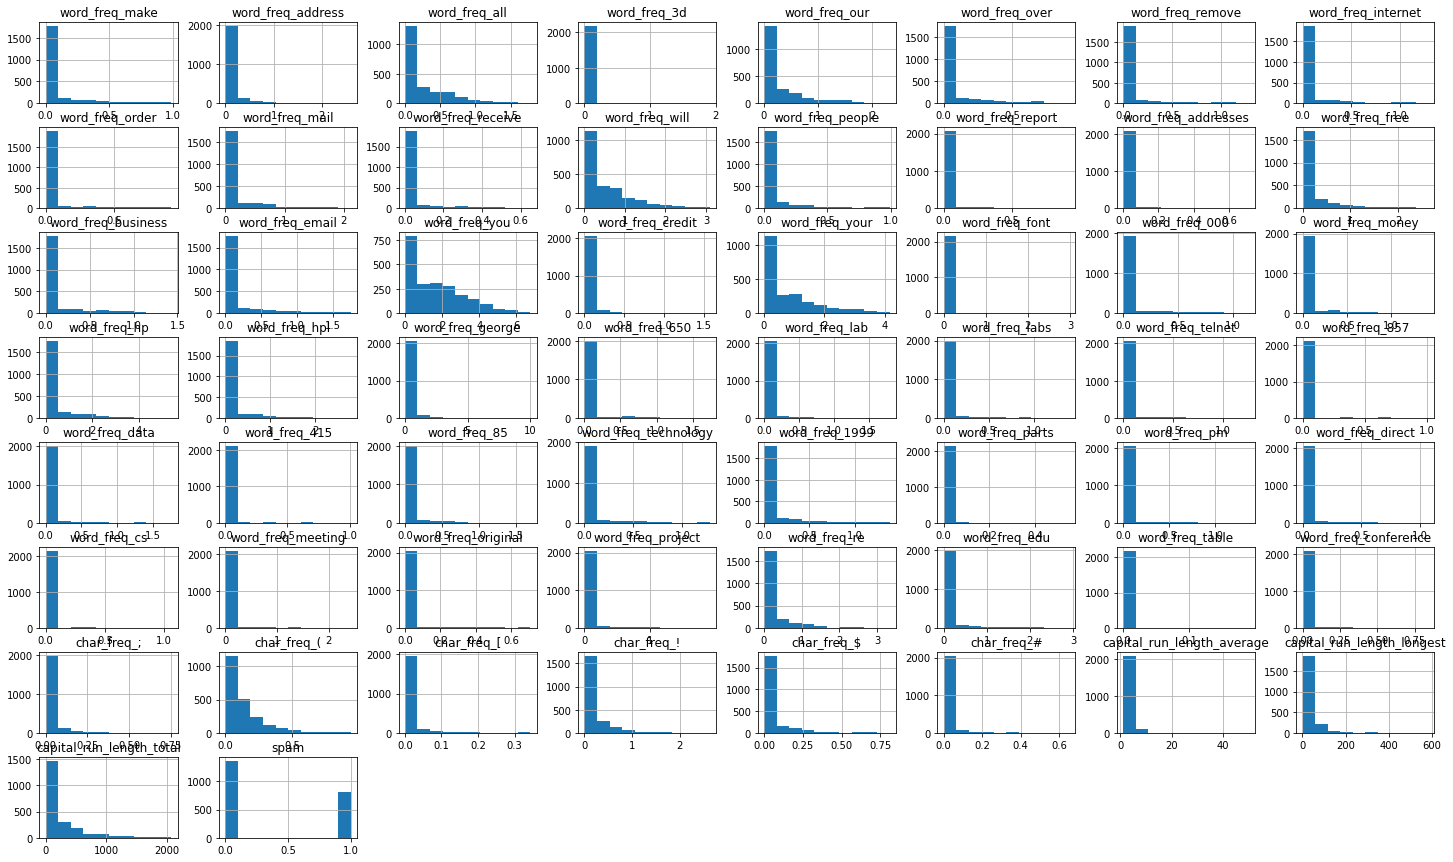

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

data_1.hist(bins=10,figsize=(25,15),)
plt.show()

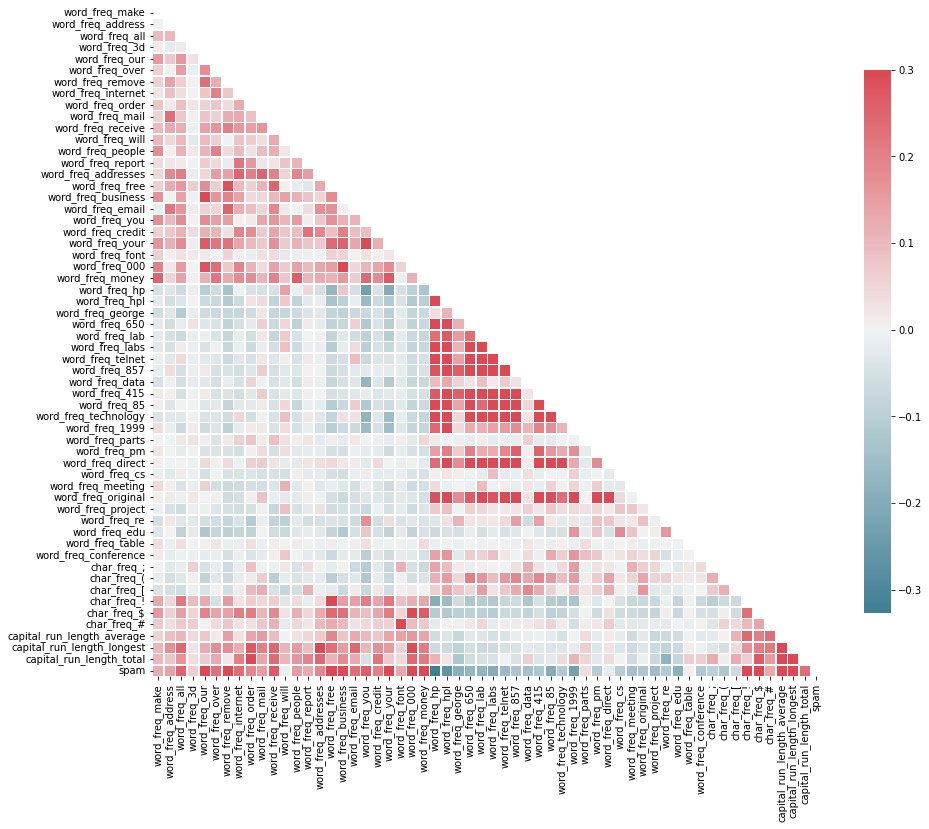

In [153]:
# Using the heatmap to check for multicolinearity
# Compute the correlation matrix
corr = data_1.corr()

#  Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,20))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

Some of the variables are highly correlated. The baseline model will incorporate all the features after which we will conduct PCA and LDA to reduce the number of independent variables then creat a model with the most important features.

# Implementing the Solution

Gaussian Naive Bayes Classifier

##Data Splitting: 70 - 30

In [154]:
X=data_1.drop('spam', axis=1)
y=data_1['spam']

In [155]:
# Splitting our data into a training set and a test set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=6)

In [156]:
# Training our model
clf = GaussianNB()
model = clf.fit(X_train, y_train)


In [157]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))


0.7408536585365854


In [158]:
print(confusion_matrix(y_test,predicted))

[[276 154]
 [ 16 210]]


* The Naive Bayes model has an accuracy of 74%

* Confusion Matrix Summary
  * True Positive : 276
  * True Negative : 210
  * False Positive : 154
  * False Negative : 16

##Data Splitting: 80 - 20

In [159]:
X = data_1.drop('spam',axis=1)
y = data_1['spam']

In [160]:
# Splitting our data for training set and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [161]:
# Training our model
clf = GaussianNB()
model = clf.fit(X_train,y_train)

In [162]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7688787185354691


In [163]:
print(confusion_matrix(y_test, predicted))

[[189  89]
 [ 12 147]]


* The Naive Bayes model has an accuracy of 76.88% which is higher than the accuracy from the 70-30 split

* Confusion Matrix Summary
  * True Positive :189
  * True Negative : 147
  * False Positive : 89
  * False Negative : 14

## Data Splitting: 60 - 40

In [164]:
# Splitting our dataset for Training set and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=6)

In [165]:
# Training our dataset
clf = GaussianNB()
model = clf.fit(X_train,y_train)

In [166]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7551487414187643


In [167]:
print(confusion_matrix(y_test,predicted))

[[369 190]
 [ 24 291]]


The Naive Bayes model has an accuracy of 75.51 which is lower than that of 70-30 split and higher than that of 80-20 split.

* Confusion Matrix Summary
  * True positive : 369
  * True Negative : 291
  * False Positive : 190
  * False Negative : 26

# Challenging the Solution

##PCA

In [168]:
#  Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs = model.components_.shape[0]

# get the index of the most important feature on each component
# List comprehension here

most_important = [np.abs(model.components_[i]).argmax()for i in range(n_pcs)]
initial_feature_names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam']

# get the names
most_important_names = [initial_feature_names[most_important[i]]for i in range(n_pcs)]

# list compehension her again
dic = {'PC{}'.format(i):most_important_names[i]for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,capital_run_length_total
1,PC1,capital_run_length_longest
2,PC2,capital_run_length_average
3,PC3,word_freq_you
4,PC4,word_freq_hp
5,PC5,word_freq_your
6,PC6,word_freq_george
7,PC7,word_freq_will
8,PC8,word_freq_our
9,PC9,word_freq_re



The dataframe above gives a list of the 10 most important features.
We then create a Naive Bayes Model using 10 most important features

In [169]:
X = data_1[['capital_run_length_total','capital_run_length_longest','capital_run_length_average','word_freq_you','word_freq_hp','word_freq_your','word_freq_george','word_freq_will','word_freq_our','word_freq_re']]
y =data_1['spam']

In [170]:
# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [171]:
# Training our model
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [172]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test).round())

1.0


In [173]:
print(confusion_matrix(y_test, predicted))


[[202 228]
 [  5 221]]


Using 10 principal components, and 70-30 data split, the model achieves 100% accuracy
all data point have been classified correctly

* Confusion Matrix
    * True Positives : 202
    * True Negatives : 221
    * False Positive : 228
    * False Negative : 535

# Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

* Did we have the right data?

Yes! we had the right data since it was sufficient in training the model.

* Did we have the right question?

Yes! The model would be useful in classifying messages and emails in a real world setup. 
Having all messages in one folder would give a terrible user experience thus classifying = sorting helps 
with this